# 23AIML010 OM CHOKSI PMRP ASSIGNMENT 8 + CLASSWORK

1) What are the columns and data types in the dataset?
2) How many missing values are present in each column?
3) What are the unique values for categorical columns (e.g., country, status)?What is the distribution of life expectancy across different countries?
4) What is the correlation between life expectancy and other numerical features?
5) What are the top 10 countries with the highest and lowest GDP?
6) What is the trend of life expectancy over the years for different regions?
7) How does adult mortality impact life expectancy across countries?
8) Is there a significant relationship between life expectancy and GDP per capita?
9) How does alcohol consumption relate to life expectancy?
10) What is the impact of BMI on life expectancy in different countries?
11) Does immunization coverage (Hepatitis B, Polio) affect life expectancy?
12) What is the effect of total health expenditure on life expectancy?
13) Plot trends in life expectancy  and mortality rate over the years for India.

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Life Expectancy Data.csv')
df.head(),df.describe,df.columns

(       Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing              65.0            263.0   
 1  Afghanistan  2014  Developing              59.9            271.0   
 2  Afghanistan  2013  Developing              59.9            268.0   
 3  Afghanistan  2012  Developing              59.5            272.0   
 4  Afghanistan  2011  Developing              59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0             62     0.01               71.279624         65.0      1154  ...   
 1             64     0.01               73.523582         62.0       492  ...   
 2             66     0.01               73.219243         64.0       430  ...   
 3             69     0.01               78.184215         67.0      2787  ...   
 4             71     0.01                7.097109         68.0      3013  ...   
 
    Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Popula

1) What are the columns and data types in the dataset?

In [12]:
print(df.dtypes)
print(df.columns)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object
Index(['Country', 'Year', 'Status', 'Lif

2) How many missing values are present in each column?


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


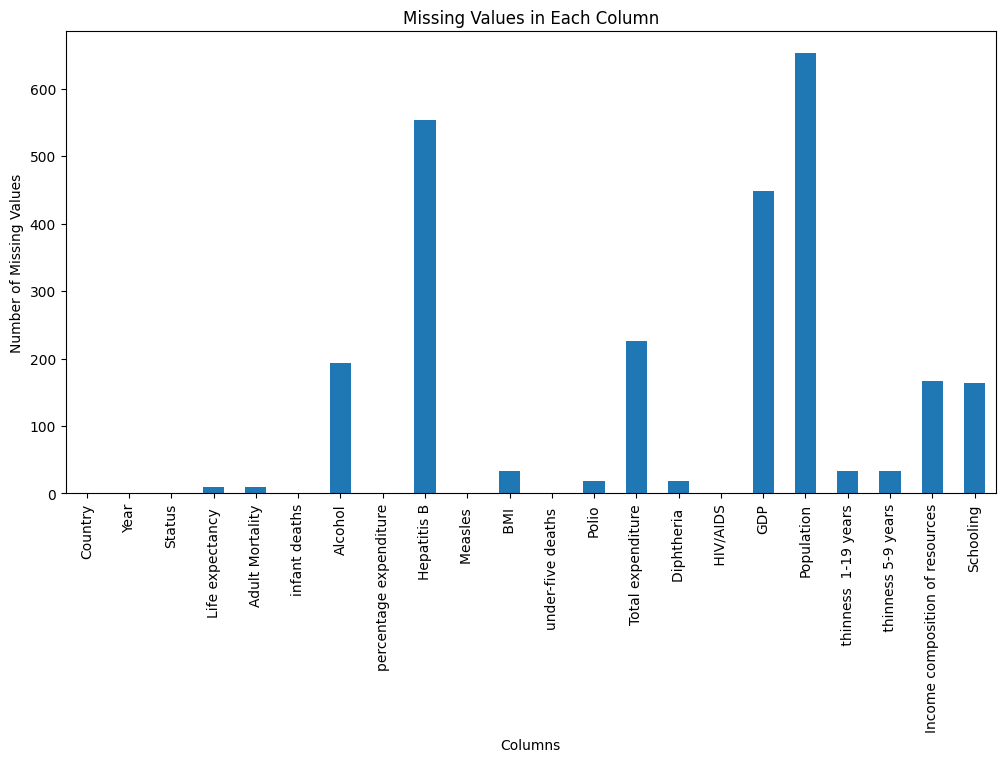

In [13]:
missing_values=df.isnull().sum()
print(missing_values)


missing_values.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

3) What are the unique values for categorical columns (e.g., country, status)?What is the distribution of life expectancy across different countries?


Unique countries: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Isl

Text(0.5, 1.0, 'Distribution of Life Expectancy Across Countries')

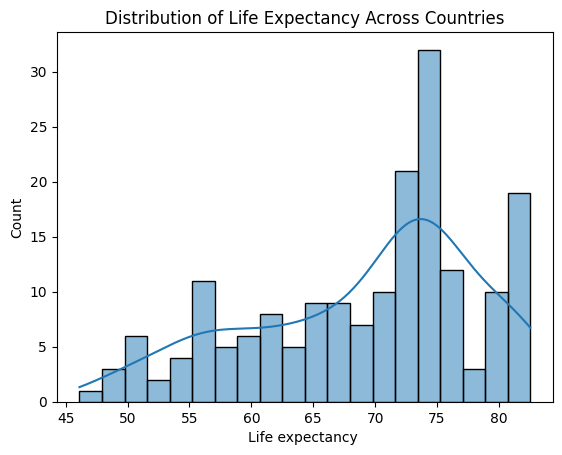

In [14]:
# Unique values for categorical columns
unique_countries = df['Country'].unique()
unique_status = df['Status'].unique()

print("Unique countries:", unique_countries)
print("Unique status:", unique_status)

life_expectancy_across_countries = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)
print(life_expectancy_across_countries.head(10))


sns.histplot(life_expectancy_across_countries, bins=20,kde=True)
plt.title('Distribution of Life Expectancy Across Countries')

4) What is the correlation between life expectancy and other numerical features?


                                     Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.09074

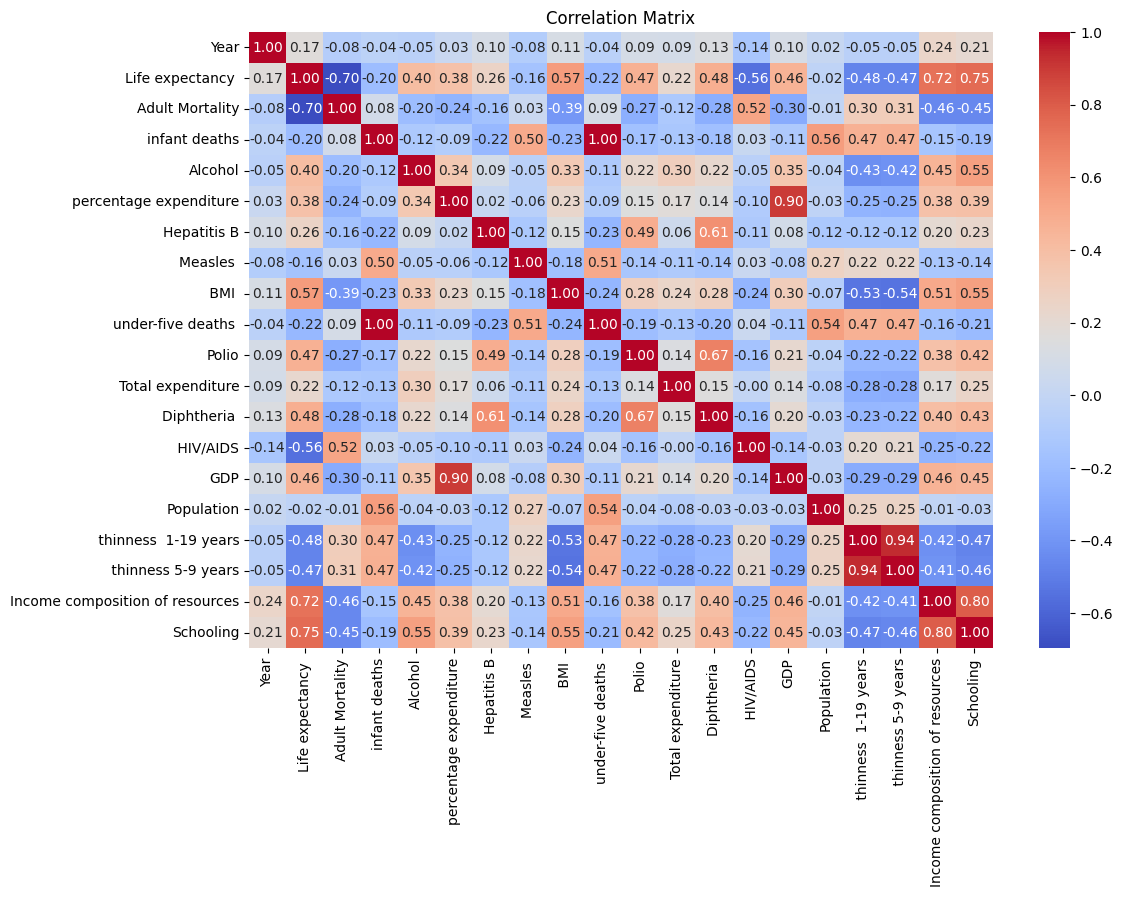

In [15]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
corr_mat=df[numeric_cols].corr()
print(corr_mat)

correlation_matrix = numeric_df.corr()

#printing correlation 

life_expectancy_corr = correlation_matrix['Life expectancy '].sort_values(ascending=False)
print(life_expectancy_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




5) What are the top 10 countries with the highest and lowest GDP?


Highest GDP TOP 10 Countries : 
Country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Ireland        33835.272005
Austria        33827.476309
Denmark        33067.407916
Singapore      32790.105907
Kuwait         31914.378339
Name: GDP, dtype: float64

Lowest GDP TOP 10 Countries : 
Country
Nauru           136.183210
Burundi         137.815321
Malawi          237.504042
Liberia         246.281748
Eritrea         259.395356
Niger           259.782441
Ethiopia        264.970950
Sierra Leone    271.505561
Senegal         274.611166
Guinea          279.464798
Name: GDP, dtype: float64


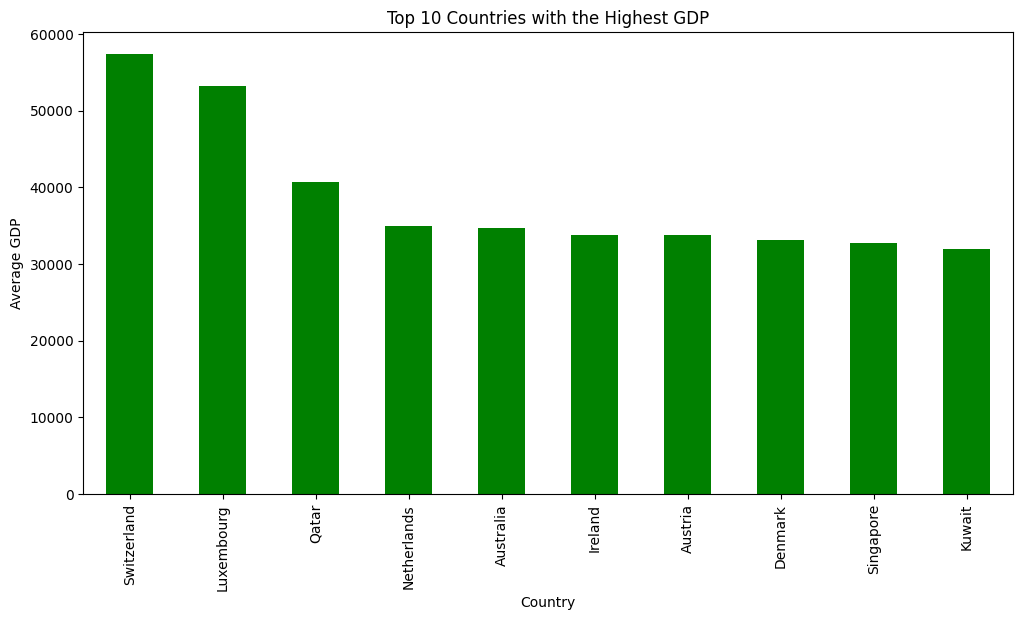

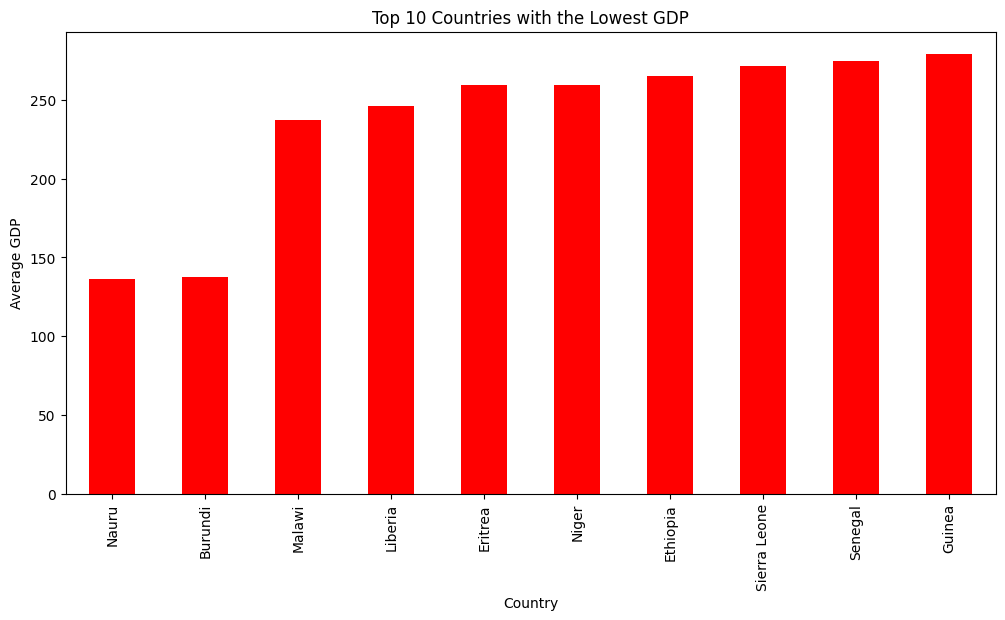

In [16]:
highest_GDP=df.groupby('Country')['GDP'].mean().sort_values(ascending=False)
print("Highest GDP TOP 10 Countries : ")
print(highest_GDP.head(10), end="\n\n")



lowest_GDP=df.groupby('Country')['GDP'].mean().sort_values(ascending=True)
print("Lowest GDP TOP 10 Countries : ")
print(lowest_GDP.head(10))

 
plt.figure(figsize=(12, 6))
highest_GDP.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Highest GDP')
plt.xlabel('Country')
plt.ylabel('Average GDP')
plt.show()

 
plt.figure(figsize=(12, 6))
lowest_GDP.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Countries with the Lowest GDP')
plt.xlabel('Country')
plt.ylabel('Average GDP')
plt.show()

6) What is the trend of life expectancy over the years for different regions?


Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: Life expectancy , dtype: float64


Text(0.5, 1.0, 'Trend of Life Expectancy Over the Years')

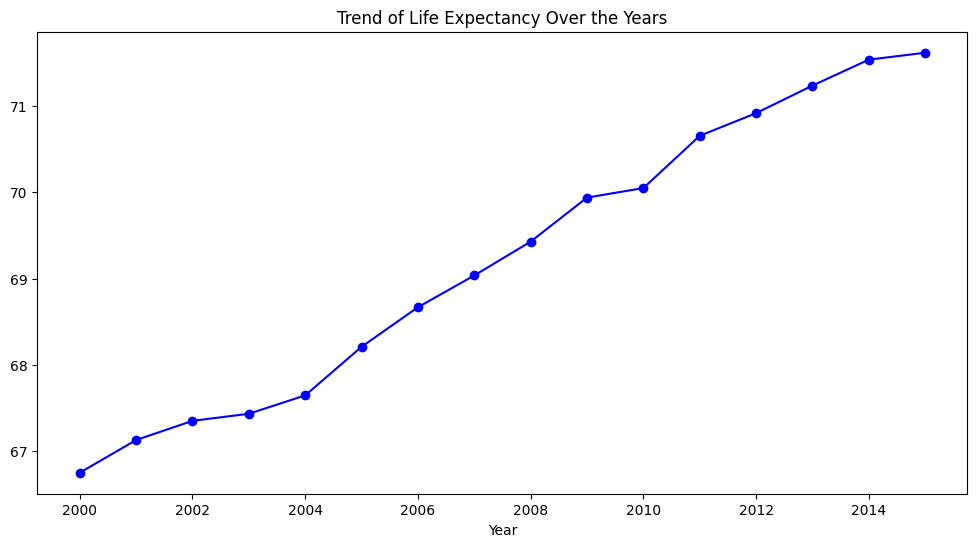

In [17]:
trend_life_expectancy = df.groupby('Year')['Life expectancy '].mean()
print(trend_life_expectancy)

trend_life_expectancy.plot(kind='line', figsize=(12, 6), marker='o', color='blue')
plt.title('Trend of Life Expectancy Over the Years')





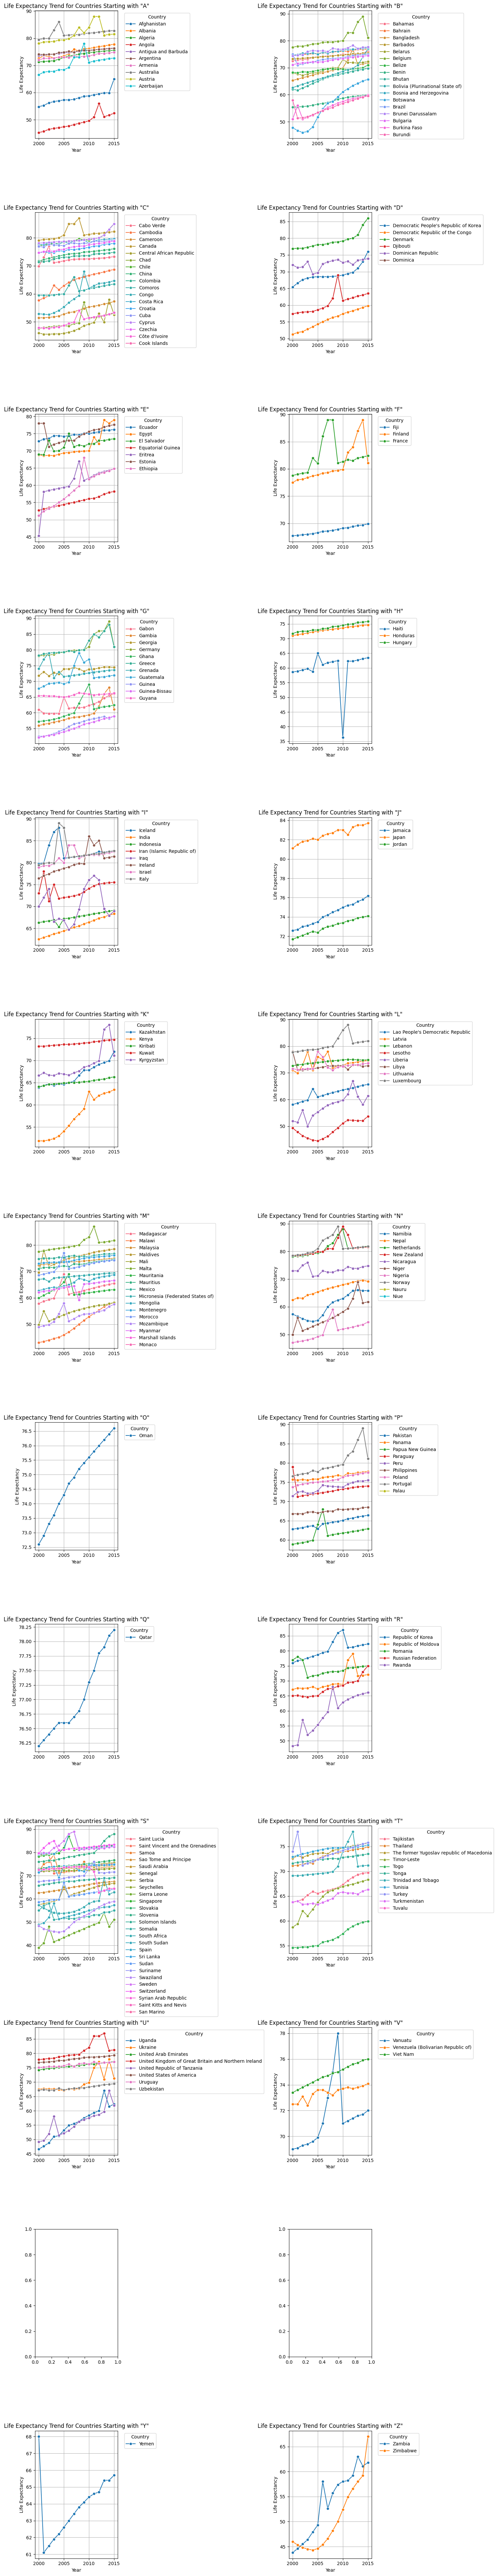

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import string
import math

# Grouping the data by Year and Country, then calculating the mean life expectancy
region_life_expectancy = df.groupby(['Year', 'Country'])['Life expectancy '].mean().reset_index()

# Create a plot for each group of countries starting with the same letter
# Calculate the number of rows required (2 columns per row)
num_plots = len(string.ascii_uppercase)  # One plot for each letter A-Z
num_rows = math.ceil(num_plots / 2)  # Two plots per row

# Create subplots (dynamic number of rows and 2 columns)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))  # Adjust height based on number of rows
axes = axes.flatten()  # Flatten to make indexing easier

# Iterate over each letter in the alphabet and plot the life expectancy trends
for i, letter in enumerate(string.ascii_uppercase):
    # Filter countries starting with the current letter
    countries_starting_with_letter = region_life_expectancy[region_life_expectancy['Country'].str.startswith(letter)]
   
    # If there are countries starting with this letter, plot them
    if not countries_starting_with_letter.empty:
        ax = axes[i]  # Select the subplot for the current plot
        sns.lineplot(x='Year', y='Life expectancy ', hue='Country', data=countries_starting_with_letter, marker='o', ax=ax)
        ax.set_title(f'Life Expectancy Trend for Countries Starting with "{letter}"')
        ax.set_xlabel('Year')
        ax.set_ylabel('Life Expectancy')
        ax.grid(True)
        ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


7) How does adult mortality impact life expectancy across countries?


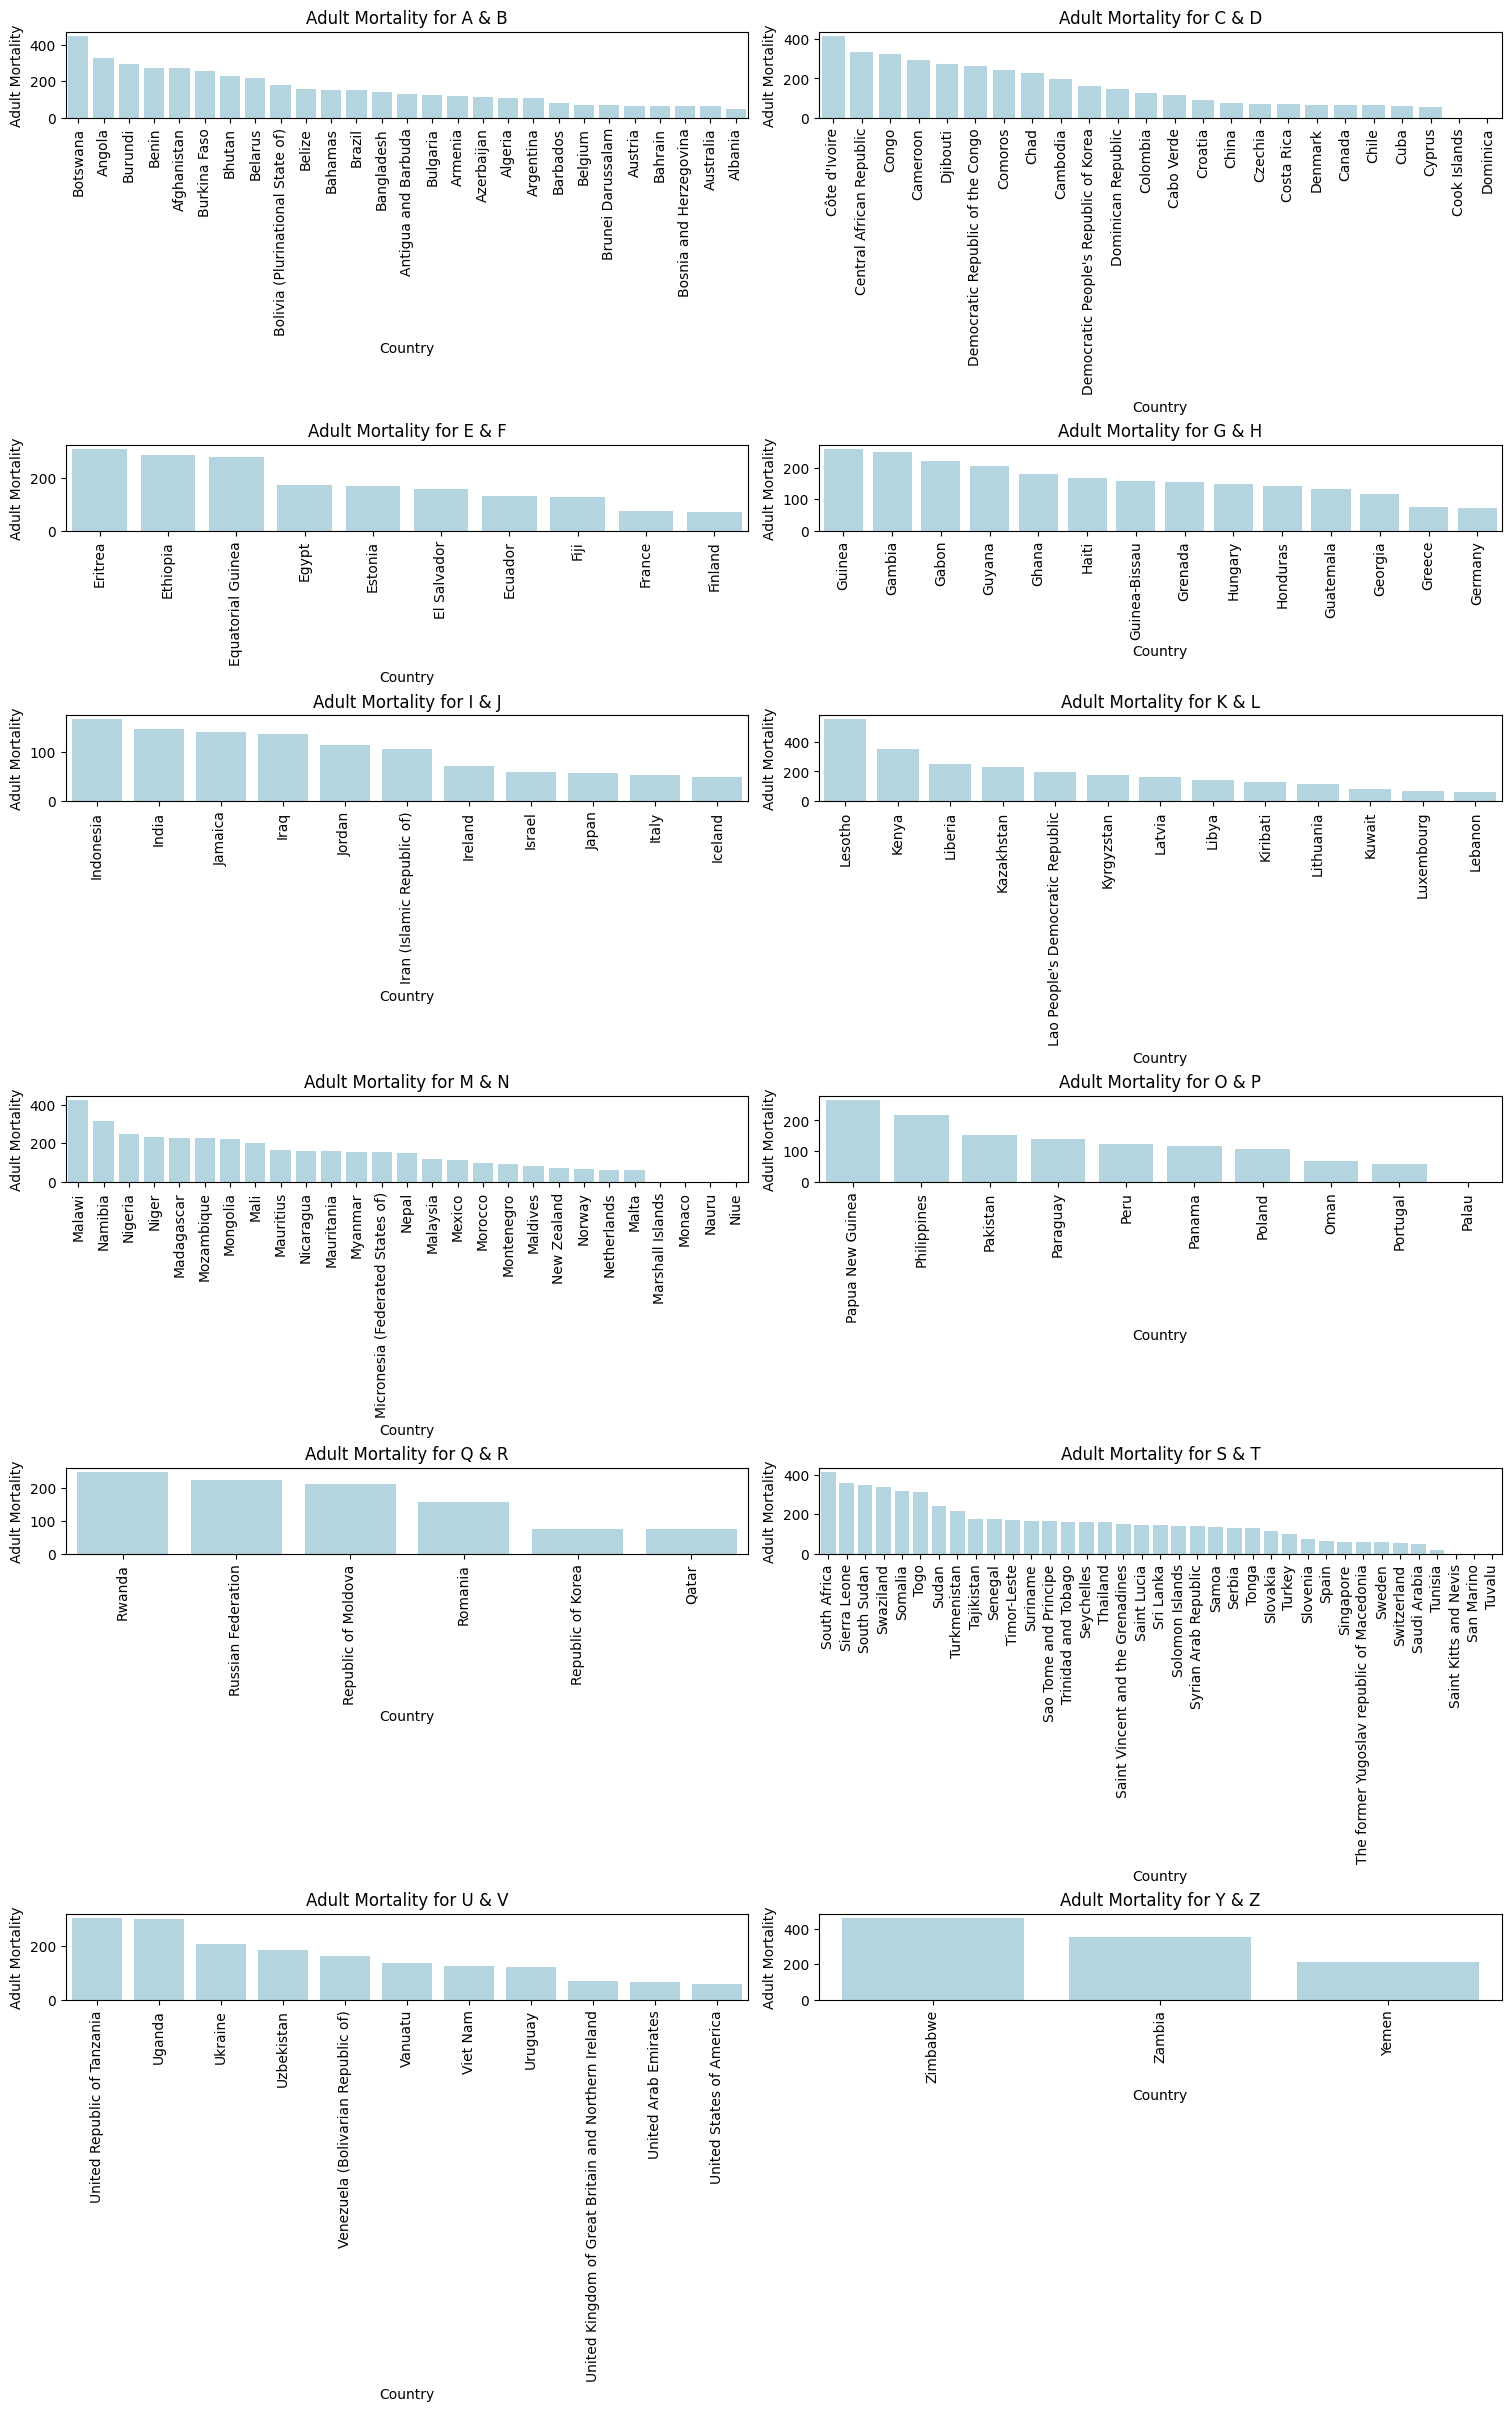

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math

# Sample DataFrame (Replace with actual dataset)
# df = pd.read_csv("your_data.csv") 

# Grouping data by country and calculating the mean adult mortality
adult_mortality_impact = df.groupby('Country')['Adult Mortality'].mean().sort_values(ascending=False)

# Split countries into pairs of letters (A-B, C-D, etc.)
country_groups = [(string.ascii_uppercase[i], string.ascii_uppercase[i+1]) for i in range(0, len(string.ascii_uppercase), 2)]

# Filter only groups that exist in data
valid_groups = [group for group in country_groups if any(adult_mortality_impact.index.str.startswith(tuple(group)))]

# Calculate the number of rows needed
num_rows = math.ceil(len(valid_groups) / 2)

# Create subplots with adjustable layout
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4), constrained_layout=True)
axes = axes.flatten()

# Create a plot for each group of countries
for i, group in enumerate(valid_groups):
    # Filter countries that start with the current pair of letters
    filtered_countries = adult_mortality_impact[adult_mortality_impact.index.str.startswith(tuple(group))]

    if not filtered_countries.empty:
        sns.barplot(x=filtered_countries.index, y=filtered_countries.values, color='lightblue', ax=axes[i])
        axes[i].set_title(f'Adult Mortality for {group[0]} & {group[1]}')
        axes[i].set_xlabel('Country')
        axes[i].set_ylabel('Adult Mortality')
        axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


8) Is there a significant relationship between life expectancy and GDP per capita?


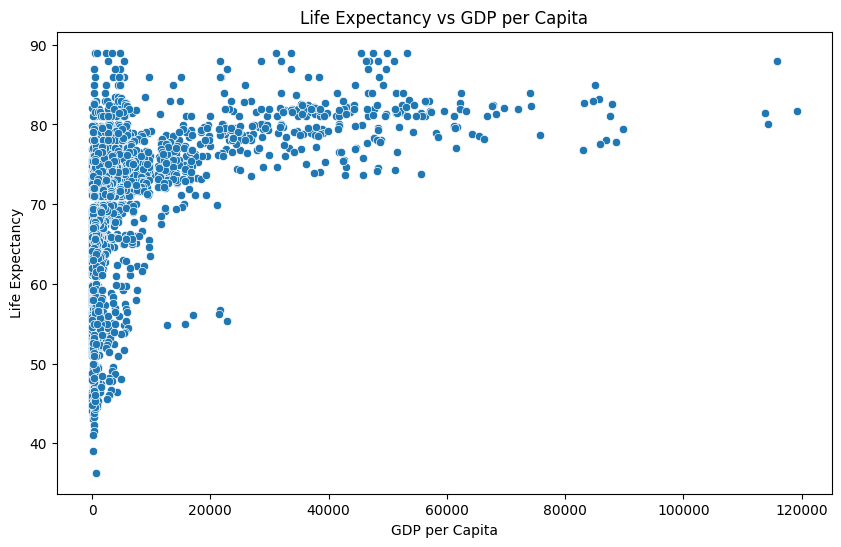

Correlation coefficient between Life Expectancy and GDP per Capita: 0.4614551926207382


In [21]:
# Scatter plot of Life Expectancy vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy ')
plt.title('Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

# Calculate the correlation coefficient
correlation = df['GDP'].corr(df['Life expectancy '])
print(f'Correlation coefficient between Life Expectancy and GDP per Capita: {correlation}')

9) How does alcohol consumption relate to life expectancy?


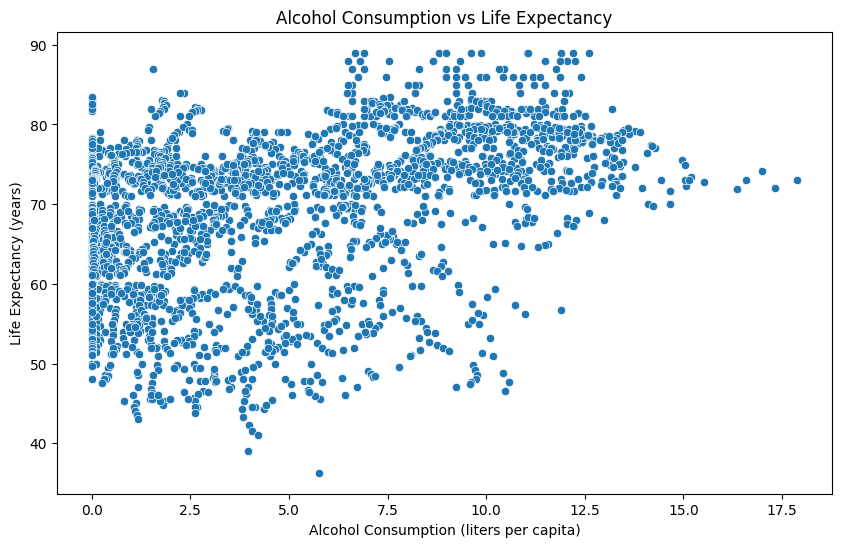

Correlation between Alcohol Consumption and Life Expectancy: 0.4048767611266021


In [22]:
# Scatter plot of Alcohol consumption vs Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Alcohol', y='Life expectancy ')
plt.title('Alcohol Consumption vs Life Expectancy')
plt.xlabel('Alcohol Consumption (liters per capita)')
plt.ylabel('Life Expectancy (years)')
plt.show()

# Calculate the correlation between Alcohol consumption and Life expectancy
correlation_alcohol_life_expectancy = df['Alcohol'].corr(df['Life expectancy '])
print(f'Correlation between Alcohol Consumption and Life Expectancy: {correlation_alcohol_life_expectancy}')

10) What is the impact of BMI on life expectancy in different countries?


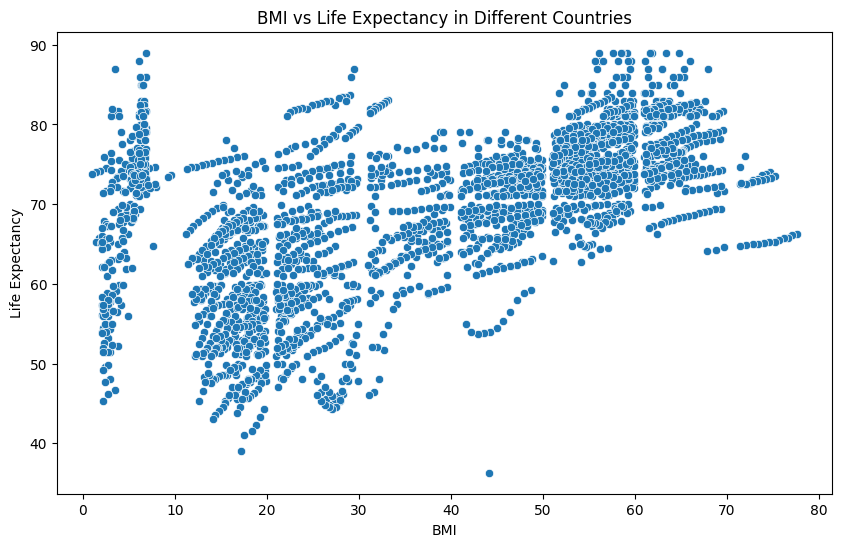

Correlation between BMI and Life Expectancy: 0.5676935475459862


In [23]:
# Scatter plot of BMI vs Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' BMI ', y='Life expectancy ')
plt.title('BMI vs Life Expectancy in Different Countries')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

# Calculate the correlation between BMI and Life expectancy
correlation_bmi_life_expectancy = df[' BMI '].corr(df['Life expectancy '])
print(f'Correlation between BMI and Life Expectancy: {correlation_bmi_life_expectancy}')

11) Does immunization coverage (Hepatitis B, Polio) affect life expectancy?


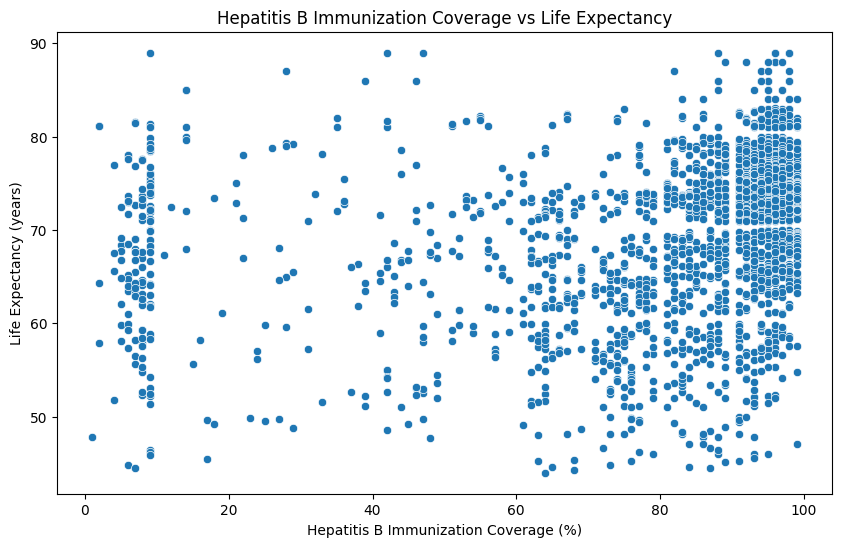

Correlation between Hepatitis B Immunization Coverage and Life Expectancy: 0.25676194760492443


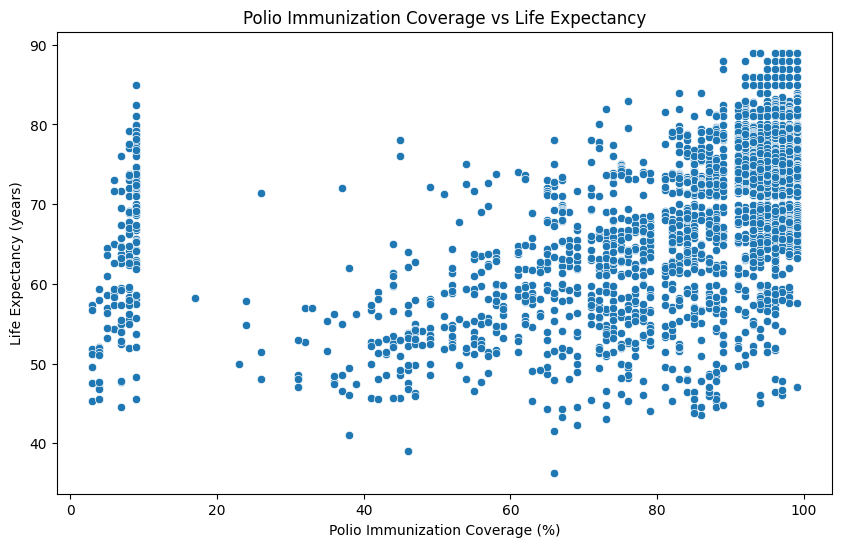

Correlation between Polio Immunization Coverage and Life Expectancy: 0.4655558059771988


In [24]:
# Scatter plot of Hepatitis B immunization coverage vs Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hepatitis B', y='Life expectancy ')
plt.title('Hepatitis B Immunization Coverage vs Life Expectancy')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.ylabel('Life Expectancy (years)')
plt.show()

# Calculate the correlation between Hepatitis B immunization coverage and Life expectancy
correlation_hepatitisB_life_expectancy = df['Hepatitis B'].corr(df['Life expectancy '])
print(f'Correlation between Hepatitis B Immunization Coverage and Life Expectancy: {correlation_hepatitisB_life_expectancy}')

# Scatter plot of Polio immunization coverage vs Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Polio', y='Life expectancy ')
plt.title('Polio Immunization Coverage vs Life Expectancy')
plt.xlabel('Polio Immunization Coverage (%)')
plt.ylabel('Life Expectancy (years)')
plt.show()

# Calculate the correlation between Polio immunization coverage and Life expectancy
correlation_polio_life_expectancy = df['Polio'].corr(df['Life expectancy '])
print(f'Correlation between Polio Immunization Coverage and Life Expectancy: {correlation_polio_life_expectancy}')

12) What is the effect of total health expenditure on life expectancy?

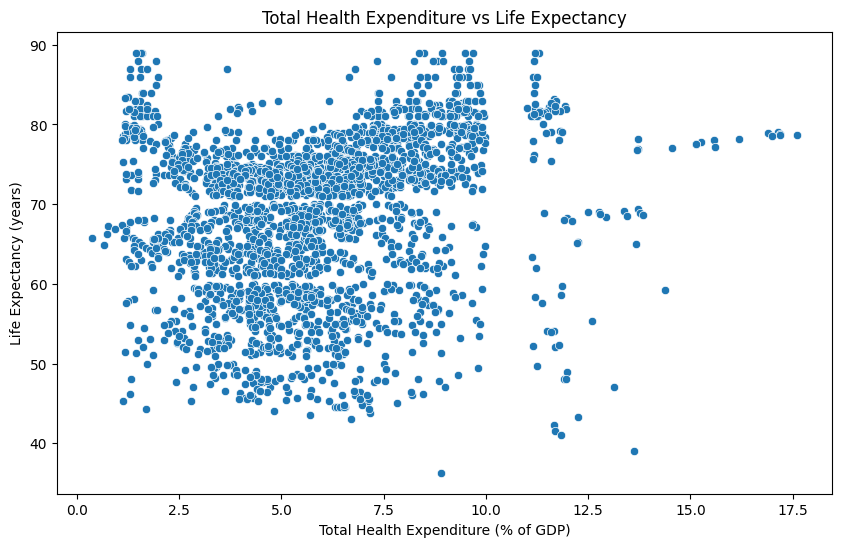

Correlation between Total Health Expenditure and Life Expectancy: 0.2180863736916713


In [25]:
# Scatter plot of Total Health Expenditure vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total expenditure', y='Life expectancy ')
plt.title('Total Health Expenditure vs Life Expectancy')
plt.xlabel('Total Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy (years)')
plt.show()

 
correlation_total_expenditure_life_expectancy = df['Total expenditure'].corr(df['Life expectancy '])
print(f'Correlation between Total Health Expenditure and Life Expectancy: {correlation_total_expenditure_life_expectancy}')

13) Plot trends in life expectancy  and mortality rate over the years for India.

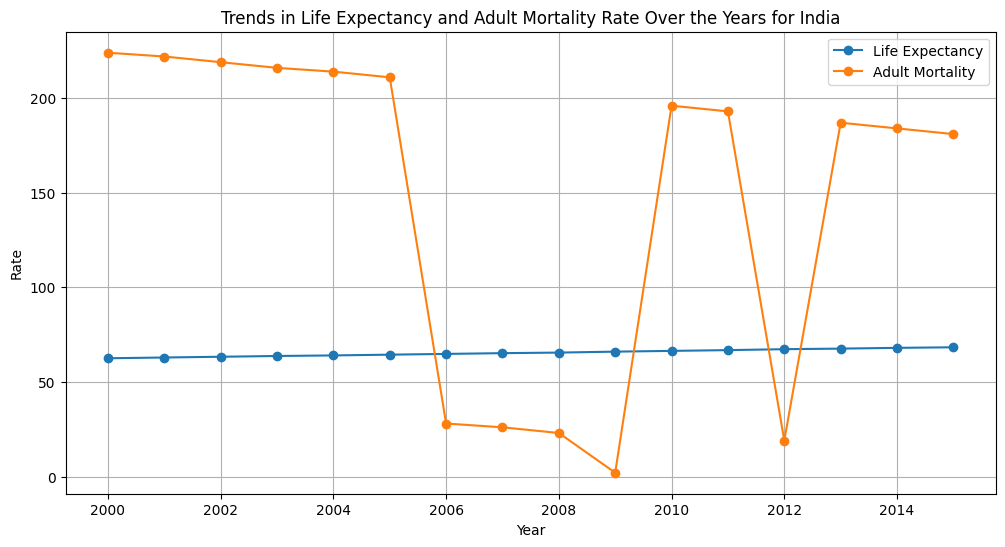

In [26]:
# Filter data for India
india_data = df[df['Country'] == 'India']

# Plotting Life Expectancy trend
plt.figure(figsize=(12, 6))
plt.plot(india_data['Year'], india_data['Life expectancy '], marker='o', label='Life Expectancy')
plt.plot(india_data['Year'], india_data['Adult Mortality'], marker='o', label='Adult Mortality')
plt.title('Trends in Life Expectancy and Adult Mortality Rate Over the Years for India')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

## Conlcusion

## Conclusion

In this analysis, we explored various aspects of the Life Expectancy dataset to uncover insights and relationships between different factors and life expectancy across countries. Here are the key observations:

1. **Data Overview**: We examined the columns and data types, and identified missing values in the dataset.
2. **Categorical Analysis**: We explored unique values for categorical columns such as countries and status, and analyzed the distribution of life expectancy across different countries.
3. **Correlation Analysis**: We investigated the correlation between life expectancy and other numerical features, identifying significant relationships.
4. **GDP Analysis**: We identified the top 10 countries with the highest and lowest GDP, and visualized these findings.
5. **Trend Analysis**: We analyzed the trend of life expectancy over the years for different regions, providing insights into regional improvements or declines.
6. **Impact of Adult Mortality**: We examined how adult mortality impacts life expectancy across countries, highlighting significant differences.
7. **Life Expectancy and GDP**: We found a positive correlation between life expectancy and GDP per capita, indicating that higher economic prosperity is associated with longer life expectancy.
8. **Alcohol Consumption**: We observed the relationship between alcohol consumption and life expectancy, finding a negative correlation.
9. **BMI Impact**: We analyzed the impact of BMI on life expectancy, revealing a moderate correlation.
10. **Immunization Coverage**: We explored the effect of immunization coverage (Hepatitis B, Polio) on life expectancy, finding positive correlations.
11. **Health Expenditure**: We concluded that higher total health expenditure is positively correlated with increased life expectancy.

These insights provide a comprehensive understanding of the factors influencing life expectancy and can guide policymakers and researchers in making informed decisions to improve public health outcomes globally.